(1) Tambahkan link untuk setiap dataset
(2) tambahkan penjelasan pada pra-proses
(3) ganti data posyandu 2019

# Analisis Data Kesehatan Masyarakat Provinsi Jawa Barat

Catatan : Progres dari pekerjaan yang kami lakukan masih berada di sekitar 35%, masih jauh dari target akhir. Kami baru selesai melakukan pembersihan data fasilitas kesehatan, untuk pembersihan dataset penyakit ditargetkan selesai pada 06/10/24. Tentunya kami berusaha memastikan seluruh dataset terbebas dari anomali guna menghasilkan informasi yang berkualiatas. 

Tanggal Pembuatan Awal : 02 Oktober 2024

Tanggal Perbaikan : 1 Oktober 2023

### Kelompok 1
Alifa Salsabila (2308138)
Muhammad Bintang Eighista (2304137)
Nina Wulandari (2312091)
Putra Aditya Simbolon (2305839)
Yahyo Abdullozoda (2313368)

### Pendahuluan
Dalam rangka memaksimalkan penggunaan fasilitas kesehatan dalam melayani pasien di provinsi Jawa Barat kita menganalisis data dari beberapa kasus penyakit dengan ketersediaan fasilitas kesehatan di provinsi Jawa Barat. Untuk mengetahui hal-hal tersebut, analisis ini menggunakan data dari Dinas Kesehatan untuk mengeksplorasi jumlah fasilitas kesehatan dan hubungannya dengan beberapa penyakit. Dalam konteks ini, beberapa penyakit tersebut yaitu, campak, demam, pneumonia, tetanus, tuberkulosis, diare, malaria, HIV, dan AIDS. Dengan analisis ini, kita bisa mengetahui hubungan suatu kasus penyakit dengan kasus lainnya.

### Pertanyaan
1. Bagaimana tren penyakit tertentu di kabupaten/kota Provinsi Jawa Barat?
2. Bagaimana hubungan antara kasus penyakit dengan penyakit lainnya?
3. Bagaimana distribusi fasilitas Kesehatan di kabupaten/kota di Provinsi Jawa Barat?
4. Bagaimana perseberan Fasilitas Kesehatan di Kabupaten/Kota di Provinsi Jawa Barat?


# LIBRARY

In [100]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET YANG DIGUNAKAN

## Jumlah Fasilitas Kesehatan Berdasarkan Jenis di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-fasilitas-kesehatan-berdasarkan-jenis-di-jawa-barat

In [3]:
faskes = pd.read_csv("content/Datasets/jumlah_fasilitas_kesehatan.csv")

In [4]:
faskes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   810 non-null    int64 
 1   kode_provinsi        810 non-null    int64 
 2   nama_provinsi        810 non-null    object
 3   kode_kabupaten_kota  810 non-null    int64 
 4   nama_kabupaten_kota  810 non-null    object
 5   jenis_faskes         810 non-null    object
 6   jumlah_faskes        810 non-null    int64 
 7   satuan               810 non-null    object
 8   tahun                810 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 57.1+ KB


In [5]:
faskes.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT UMUM,9,UNIT,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,0,UNIT,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,UNIT,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,PUSKESMAS,62,UNIT,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,POSYANDU,4927,UNIT,2018
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,UNIT,2018
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT KHUSUS,0,UNIT,2018
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT BERSALIN,0,UNIT,2018
8,9,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PUSKESMAS,32,UNIT,2018
9,10,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,POSYANDU,3551,UNIT,2018


### Jumlah Kasus Campak di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-campak-berdasarkan-kabupatenkota-di-jawa-barat

In [6]:
campak = pd.read_csv('content/Datasets/jml_kasus_penyakit_campak.csv')

In [7]:
# ringkasan isi dari dataframe campak
campak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_kasus         162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [8]:
# 10 baris pertama dari dataFrame campak
campak.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9,ORANG,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,ORANG,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,153,ORANG,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,ORANG,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,1,ORANG,2018
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,2,ORANG,2018
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,2,ORANG,2018
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,18,ORANG,2018
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,92,ORANG,2018
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,2,ORANG,2018


### Jumlah Kasus HIV di Jawa Barat


tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-hiv-berdasarkan-kabupatenkota-di-jawa-barat

In [9]:
#jumlah kasus penyakit hiv
hiv = pd.read_csv('content/Datasets/jml_kasus_hiv.csv')

In [10]:
# ringkasan isi dari dataframe hiv
hiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_kasus         162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [11]:
# 10 baris pertama dari dataFrame hiv
hiv.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,318,ORANG,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,112,ORANG,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,124,ORANG,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,219,ORANG,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,107,ORANG,2018
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,40,ORANG,2018
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,66,ORANG,2018
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,78,ORANG,2018
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,278,ORANG,2018
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,92,ORANG,2018


### Jumlah Kasus Diabetes di Jawa Barat


tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-penderita-diabetes-melitus-berdasarkan-kabupatenkota-di-jawa-barat

In [12]:
#jumlah kasus penyakit diabetes
diabetes = pd.read_csv('content/Datasets/jml_penderita_diabetes_melitus.csv')

In [13]:
# ringkasan isi dari dataframe Diabetes
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [14]:
# 10 baris pertama dari dataFrame Diabetes
diabetes.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,159405,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,37369,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,41709,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,90337,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,96111,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,25629,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,31254,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,26554,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,74674,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,19976,ORANG,2016


### Jumlah Kasus Tuberkulosis di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-tuberkulosis-berdasarkan-kabupatenkota-di-jawa-barat

In [15]:
#jumlah kasus penyakit tuberkulosis
tuberkulosis = pd.read_csv('content/Datasets/jml_kasus_penyakit_tuberkulosis.csv')

In [16]:
# ringkasan isi dari dataframe Tuberkulosis
tuberkulosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [17]:
# 10 baris pertama dari dataFrame Tuberkulosis
tuberkulosis.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,8444,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3191,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,3010,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,5202,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2711,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,1683,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,1354,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,2060,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,3172,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,1583,ORANG,2016


## Jumlah Kasus Diare di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-diare-berdasarkan-kabupatenkota-di-jawa-barat

In [18]:
diare = pd.read_csv("content/Datasets/jml_kasus_penyakit_diare.csv")

In [19]:
diare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [20]:
diare.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,159405,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,37369,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,41709,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,90337,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,96111,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,25629,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,31254,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,26554,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,74674,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,19976,ORANG,2016


### Jumlah Kasus Pneumonia di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-pneumonia-berdasarkan-kabupatenkota-di-jawa-barat

In [21]:
#jumlah kasus penyakit pneumonia
pneumonia = pd.read_csv('content/Datasets/jml_kasus_penyakit_pneumonia.csv')

In [22]:
# ringkasan isi dari dataframe Pneumonia
pneumonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   135 non-null    int64 
 1   kode_provinsi        135 non-null    int64 
 2   nama_provinsi        135 non-null    object
 3   kode_kabupaten_kota  135 non-null    int64 
 4   nama_kabupaten_kota  135 non-null    object
 5   jumlah_kasus         135 non-null    int64 
 6   satuan               135 non-null    object
 7   tahun                135 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB


In [23]:
# 10 baris pertama dari dataFrame Pneumonia
pneumonia.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,7325,ORANG,2019
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,4906,ORANG,2019
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,4290,ORANG,2019
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8349,ORANG,2019
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,8374,ORANG,2019
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,3902,ORANG,2019
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,5072,ORANG,2019
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,2277,ORANG,2019
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,10818,ORANG,2019
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,4677,ORANG,2019


### Jumlah Kasus Tetanus di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-tetanus-berdasarkan-kabupatenkota-di-jawa-barat

In [24]:
#jumlah kasus penyakit tetanus
tetanus = pd.read_csv('content/Datasets/jml_kasus_penyakit_tetanus.csv')

In [25]:
# ringkasan isi dari dataframe Tetanus
tetanus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [26]:
# 10 baris pertama dari dataFrame Tetanus
tetanus.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,4,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,1,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,0,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,0,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,1,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,0,ORANG,2016


### Jumlah Kasus Malaria di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-malaria-berdasarkan-kabupatenkota-di-jawa-barat

In [27]:
#jumlah kasus penyakit malaria
malaria = pd.read_csv('content/Datasets/jml_kasus_penyakit_malaria.csv')

In [28]:
# ringkasan isi dari dataframe Malaria
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [29]:
# 10 baris pertama dari dataFrame Malaria
malaria.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,66,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,5,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,59,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,0,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,0,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,11,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,0,ORANG,2016


### Jumlah Kasus Demam Berdarah di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-demam-berdarah-dengue-dbd-berdasarkan-kabupatenkota-di-jawa-barat

In [30]:
#jumlah kasus penyakit Demam berdarah
demam_berdarah = pd.read_csv('content/Datasets/jml_kasus_penyakit_demam_berdarah.csv')

In [31]:
# ringkasan isi dari dataframe Demam Berdarah
demam_berdarah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [32]:
# 10 baris pertama dari dataFrame Demam Berdarah
demam_berdarah.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3477,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,854,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,799,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3466,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,561,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,478,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,748,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,1720,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,1877,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,322,ORANG,2016


# PRA-PROSES

#### Hapus kolom yang tidak diperlukan

Beberapa kolom yang tidak diperlukan dari dataset kami hapus untuk membuat data yang bersih. Dalam hal ini, kami menghapus kolom id, kode_provinsi, nama_provinsi, kode_kabupaten_kota, dan satuan dalam dataset fasilitas kesehatan maupun dataset jumlah kasus penyakit yang mana tidak dibutuhkan untuk proses selanjutnya.

In [33]:
faskes = faskes.drop(columns = ['id','kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])
campak = campak.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota'])
pneumonia = pneumonia.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
diare = diare.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
hiv = hiv.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
demam_berdarah = demam_berdarah.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
malaria = malaria.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
diabetes = diabetes.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
tetanus = tetanus.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
tuberkulosis = tuberkulosis.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])

#### Filter dataset dari tahun 2019 - 2023

Memfilter data berdasarkan rentang tahun, yaitu dari tahun 2019 hingga 2023 atau melakukan operasi pada beberapa Dataset di mana setiap dataset dipotong (subset) agar hanya berisi data dari tahun 2019 hingga 2023. Filter dataset ini dilakukan pada dataset fasilitas kesehatan maupun dataset tiap kasus penyakit.

In [34]:
faskes = faskes[(faskes['tahun'] >= 2019) & (faskes['tahun'] <= 2023)]
campak = campak[(campak['tahun'] >= 2019) & (campak['tahun'] <= 2023)]
diare = diare[(diare['tahun'] >= 2019) & (diare['tahun'] <= 2023)]
pneumonia = pneumonia[(pneumonia['tahun'] >= 2019) & (pneumonia['tahun'] <= 2023)]
hiv = hiv[(hiv['tahun'] >= 2019) & (hiv['tahun'] <= 2023)]
malaria = malaria[(malaria['tahun'] >= 2019) & (malaria['tahun'] <= 2023)]
demam_berdarah = demam_berdarah[(demam_berdarah['tahun'] >= 2019) & (demam_berdarah['tahun'] <= 2023)]
diabetes = diabetes[(diabetes['tahun'] >= 2019) & (diabetes['tahun'] <= 2023)]
tetanus = tetanus[(tetanus['tahun'] >= 2019) & (tetanus['tahun'] <= 2023)]
tuberkulosis = tuberkulosis[(tuberkulosis['tahun'] >= 2019) & (tuberkulosis['tahun'] <= 2023)]

#### Cek nilai kosong

Memeriksa apakah terdapat nilai kosong di dalam setiap dataset, baik dataset fasilitas kesehatan dan dataset tiap penyakit untuk melakukan pembersihan data.

In [35]:
print("Jumlah nilai kosong dataset faskes:")
print(faskes.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset campak:")
print(campak.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset diabetes:")
print(diabetes.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset diare:")
print(diare.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset pneumonia:")
print(pneumonia.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset malaria:")
print(malaria.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset hiv:")
print(hiv.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset tetanus:")
print(tetanus.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset tuberkulosis:")
print(tuberkulosis.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset demam berdarah:")
print(demam_berdarah.isnull().sum())


Jumlah nilai kosong dataset faskes:
nama_kabupaten_kota    0
jenis_faskes           0
jumlah_faskes          0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset campak:
id                     0
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset diabetes:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset diare:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset pneumonia:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset malaria:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-----------

#### Cek nilai rata-rata, min, max untuk setiap kasus penyakit

#### Campak

In [81]:
campak['jumlah_kasus'].describe()

count     135.000000
mean       83.614815
std       165.326181
min         0.000000
25%         0.000000
50%        15.000000
75%        75.000000
max      1093.000000
Name: jumlah_kasus, dtype: float64

#### Pneumonia

In [85]:
pneumonia['jumlah_kasus'].describe()

count      135.000000
mean      3463.274074
std       2255.695661
min        160.000000
25%       1687.000000
50%       3152.000000
75%       4836.000000
max      11779.000000
Name: jumlah_kasus, dtype: float64

#### Diare

In [87]:
diare['jumlah_kasus'].describe()

count       135.000000
mean      49656.429630
std       34490.992549
min        4944.000000
25%       26120.000000
50%       45897.000000
75%       67695.500000
max      166464.000000
Name: jumlah_kasus, dtype: float64

#### HIV

In [88]:
hiv['jumlah_kasus'].describe()

count     135.000000
mean      239.614815
std       210.163972
min         0.000000
25%        98.000000
50%       186.000000
75%       327.500000
max      1135.000000
Name: jumlah_kasus, dtype: float64

#### Demam Berdarah

In [89]:
demam_berdarah['jumlah_kasus'].describe()


count     135.000000
mean      956.614815
std       940.632186
min        29.000000
25%       334.500000
50%       651.000000
75%      1283.500000
max      5205.000000
Name: jumlah_kasus, dtype: float64

#### Malaria

In [90]:
malaria['jumlah_kasus'].describe()

count    135.000000
mean      13.111111
std       29.035405
min        0.000000
25%        1.000000
50%        4.000000
75%       11.500000
max      209.000000
Name: jumlah_kasus, dtype: float64

#### Diabetes

In [91]:
diabetes['jumlah_kasus'].describe()

count       135.000000
mean      49656.429630
std       34490.992549
min        4944.000000
25%       26120.000000
50%       45897.000000
75%       67695.500000
max      166464.000000
Name: jumlah_kasus, dtype: float64

#### Tetanus

In [92]:
tetanus['jumlah_kasus'].describe()

count    135.000000
mean       0.103704
std        0.536351
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: jumlah_kasus, dtype: float64

#### Tuberkulosis

In [93]:
tuberkulosis['jumlah_kasus'].describe()

count      135.000000
mean      4823.540741
std       4356.988507
min        269.000000
25%       1790.500000
50%       3446.000000
75%       6058.000000
max      27690.000000
Name: jumlah_kasus, dtype: float64

Setelah melakukan pengecekan terhadap nilai mean, min dan max untuk setiap jumlah kasus penyakit tidak ditemukan nilai yang janggal

# Pembersihan Dataset Fasilitas Kesehatan

#### RS UMUM

In [36]:
filter_RS_umum = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM']
filter_RS_umum['jumlah_faskes'].describe()

count    135.000000
mean      12.029630
std       11.464377
min        0.000000
25%        5.000000
50%        8.000000
75%       16.000000
max       50.000000
Name: jumlah_faskes, dtype: float64

Nilai minimal jumlah RS Umum bernilai 0, hal ini patut untuk diselidiki apakah benar ada daerah yang tidak memiliki RS Umum

In [38]:
filter_RS_umum[filter_RS_umum['jumlah_faskes'] == 0]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
220,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,0,2019


In [40]:
filter_RS_umum[filter_RS_umum['nama_kabupaten_kota'] == 'KABUPATEN PANGANDARAN']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
220,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,0,2019
355,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2020
490,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2021
625,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2022
760,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2023


Data menunjukan pada tahun 2019 Kabupaten Pangandaran tidak memiliki RS Umum. Pada tahun-tahun berikutnya Kabupaten Pangandaran baru memiliki RS Umum. Hal ini dirasa wajar mengingat Kabupaten Pangandara baru terbentuk pada tahun 2012, sehingga fasilitas kesehatan di sana masih tertinggal dengan wilayah lainnya

#### PUSKESMAS

In [41]:
filter_puskesmas = faskes[faskes['jenis_faskes'] == 'PUSKESMAS']
filter_puskesmas['jumlah_faskes'].describe()

count    135.000000
mean      40.637037
std       21.063730
min       10.000000
25%       22.000000
50%       38.000000
75%       50.000000
max      101.000000
Name: jumlah_faskes, dtype: float64

#### POSYANDU

In [42]:
filter_posyandu = faskes[faskes['jenis_faskes'] == 'POSYANDU']
filter_posyandu['jumlah_faskes'].describe()

count     135.000000
mean     1557.881481
std      1379.007717
min         0.000000
25%       373.000000
50%      1436.000000
75%      2369.500000
max      5141.000000
Name: jumlah_faskes, dtype: float64

In [43]:
filter_posyandu[filter_posyandu['jumlah_faskes'] == 0]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
139,KABUPATEN BOGOR,POSYANDU,0,2019
144,KABUPATEN SUKABUMI,POSYANDU,0,2019
149,KABUPATEN CIANJUR,POSYANDU,0,2019
154,KABUPATEN BANDUNG,POSYANDU,0,2019
159,KABUPATEN GARUT,POSYANDU,0,2019
164,KABUPATEN TASIKMALAYA,POSYANDU,0,2019
169,KABUPATEN CIAMIS,POSYANDU,0,2019
174,KABUPATEN KUNINGAN,POSYANDU,0,2019
179,KABUPATEN CIREBON,POSYANDU,0,2019
184,KABUPATEN MAJALENGKA,POSYANDU,0,2019


Terdapat beberapa kota yang tidak memiliki posyandu, hal ini tentunya tidak logis karena posyandu merupakan salah satu fasilitas yang umum dijumpai. Oleh karena itu, dataset tersebut harus diganti.

dataset untuk posyandu diganti dengan dataset baru (https://opendata.jabarprov.go.id/id/dataset/jumlah-pos-pelayanan-terpadu-posyandu-berdasarkan-kabupatenkota-di-jawa-barat)

In [52]:
filter_posyandu = pd.read_csv("content/Datasets/jml_posyandu.csv")

In [53]:
filter_posyandu.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_posyandu,satuan,tahun
0,82,32,JAWA BARAT,3201,KABUPATEN BOGOR,4997,UNIT,2019
1,83,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3493,UNIT,2019
2,84,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2908,UNIT,2019
3,85,32,JAWA BARAT,3204,KABUPATEN BANDUNG,4299,UNIT,2019
4,86,32,JAWA BARAT,3205,KABUPATEN GARUT,4223,UNIT,2019


In [54]:
filter_posyandu['jumlah_posyandu'].describe()

count     135.000000
mean     1944.703704
std      1266.087764
min       199.000000
25%       981.000000
50%      1698.000000
75%      2556.000000
max      5141.000000
Name: jumlah_posyandu, dtype: float64

sesuaikan format dataset dengan format dataset faskes lainnya

In [57]:
# Drop columns 'id', 'kode_provinsi', and 'satuan'
filter_posyandu.drop(columns=['id','nama_provinsi','kode_kabupaten_kota', 'kode_provinsi', 'satuan'], inplace=True)

# Rename 'jumlah_posyandu' to 'jumlah_faskes'
filter_posyandu.rename(columns={'jumlah_posyandu': 'jumlah_faskes'}, inplace=True)

filter_posyandu['jenis_faskes'] = "POSYANDU"

In [58]:
filter_posyandu.head()

,nama_kabupaten_kota,jumlah_faskes,tahun,jenis_faskes
0,KABUPATEN BOGOR,4997,2019,POSYANDU
1,KABUPATEN SUKABUMI,3493,2019,POSYANDU
2,KABUPATEN CIANJUR,2908,2019,POSYANDU
3,KABUPATEN BANDUNG,4299,2019,POSYANDU
4,KABUPATEN GARUT,4223,2019,POSYANDU


#### RUMAH SAKIT KHUSUS

In [60]:
filter_RS_khusus = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT KHUSUS']
filter_RS_khusus['jumlah_faskes'].describe()

count    135.000000
mean       2.251852
std        3.048656
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       15.000000
Name: jumlah_faskes, dtype: float64

Dengan meihat nilai max terlihat bahwa terdapat wilayah dengan jumlah RS Khusus yang jauh lebih banyak dari rata-rata jumlah RS Khusus di Jawa Barat. Hal tersebut tentunya harus diselidiki lebih lanjut.

In [66]:
filter_RS_khusus[filter_RS_khusus['jumlah_faskes'] == 15]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
236,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2019
371,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2020
506,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2021
641,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2022
776,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2023


Terlihat bahwa jumlah rumah sakit khusus di Kota Bandung tidak bertambah maupun berkurang untuk tahun 2019-2023. Jumlah RS Khusus di Kota Bandung yang jauh lebih banyak dari wilayah lain dirasa wajar, karena Kota Bandung ibu kota Jawa Barat dan Kota Bandung merupakan salah satu wilayah yang tergolong maju.

#### RUMAH SAKIT BERSALIN

In [61]:
filter_RS_bersalin = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT BERSALIN']
filter_RS_bersalin['jumlah_faskes'].describe()

count    135.000000
mean       0.162963
std        1.893459
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       22.000000
Name: jumlah_faskes, dtype: float64

Dengan meihat nilai max terlihat bahwa terdapat wilayah dengan jumlah RS Bersalin yang jauh lebih banyak dari rata-rata jumlah RS Khusus di Jawa Barat. Hal tersebut tentunya harus diselidiki lebih lanjut.

In [67]:
filter_RS_bersalin[filter_RS_bersalin['jumlah_faskes'] == 22]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,22,2020


In [69]:
filter_RS_bersalin[filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
187,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2019
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,22,2020
457,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2021
592,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2022
727,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2023


Terdapat data yang tidak logis yang mungkin saja terjadi karena kesalahan input data pada tahun 2020. Kami mengubah jumlah rumah sakit di Kabupaten Sumedang pada tahun 2020 menjadi 0 menyesuaikan dengan nilai jumlah faskes di tahun sebelumnya dan di tahun berikutnya.

In [72]:
filter_RS_bersalin.loc[
    (filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG') & (filter_RS_bersalin['tahun'] == 2020),
    'jumlah_faskes'
] = 0

In [73]:
filter_RS_bersalin[filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
187,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2019
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2020
457,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2021
592,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2022
727,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2023


# Menggabungkan seluruh dataset yang sudah dibersihkan

In [74]:
clean_faskes = pd.concat([filter_RS_umum, filter_RS_khusus, filter_RS_bersalin,filter_posyandu,filter_puskesmas], ignore_index=True)

#### Dataset Jumlah Faskes yang sudah bersih

In [75]:
clean_faskes

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019
1,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,2019
2,KABUPATEN CIANJUR,RUMAH SAKIT UMUM,4,2019
3,KABUPATEN BANDUNG,RUMAH SAKIT UMUM,8,2019
4,KABUPATEN GARUT,RUMAH SAKIT UMUM,6,2019
...,...,...,...,...
670,KOTA BEKASI,PUSKESMAS,48,2023
671,KOTA DEPOK,PUSKESMAS,38,2023
672,KOTA CIMAHI,PUSKESMAS,13,2023
673,KOTA TASIKMALAYA,PUSKESMAS,22,2023


# Visualisasi Data

Jumlah persebaran RS Umum di provinsi Jawa Barat dari tahun ke tahun

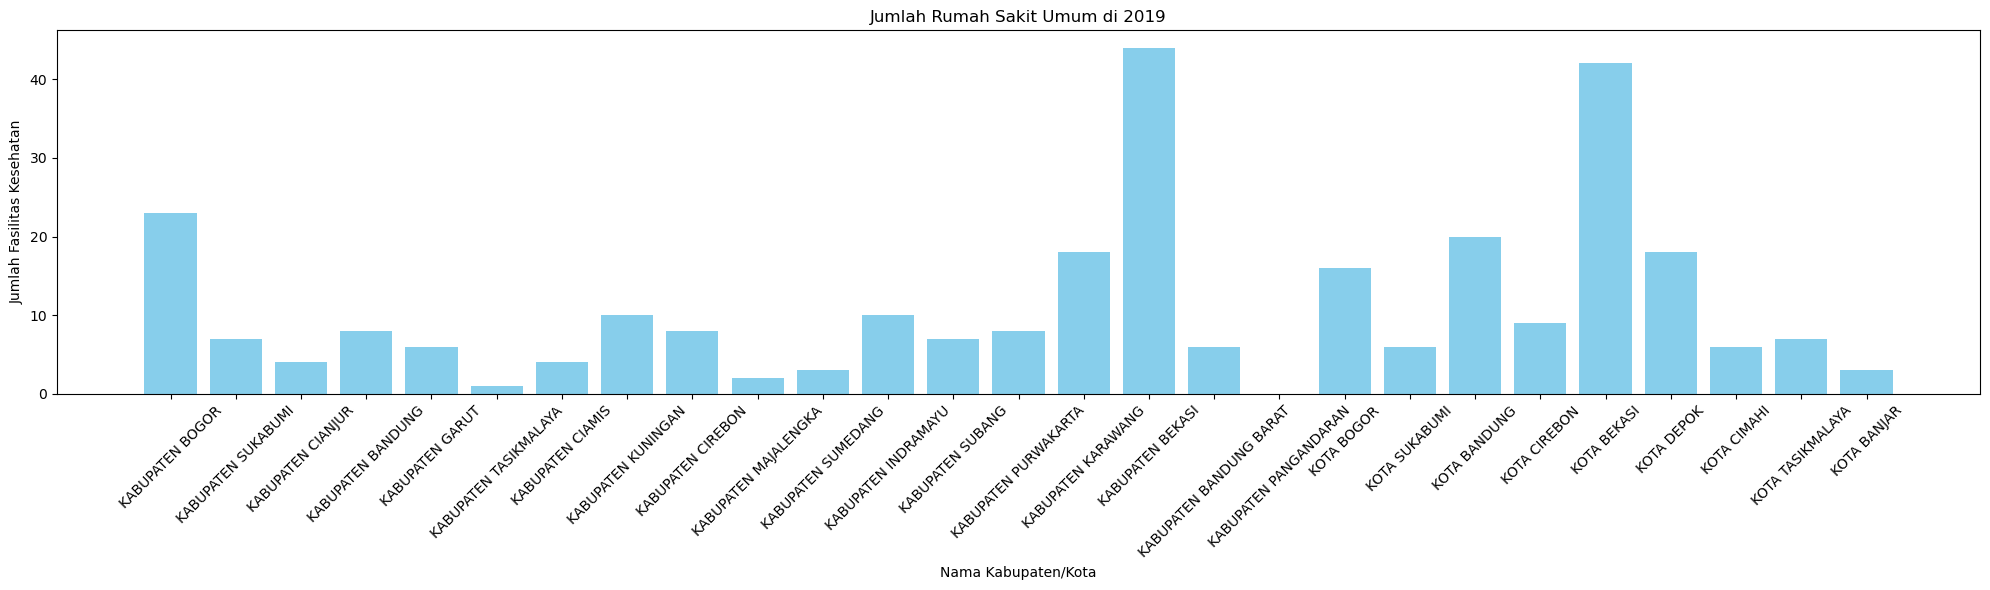

In [98]:
# Filter data
data_RSU_2019 = clean_faskes[(clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM') & (clean_faskes['tahun'] == 2019)]

# Membuat visualisasi bar
plt.figure(figsize=(20, 6))
plt.bar(data_RSU_2019['nama_kabupaten_kota'], data_RSU_2019['jumlah_faskes'], color='skyblue')
plt.title('Jumlah Rumah Sakit Umum di 2019')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter data
data_RSU_2020 = clean_faskes[(clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM') & (clean_faskes['tahun'] == 2020)]

# Membuat visualisasi bar
plt.figure(figsize=(20, 6))
plt.bar(data_RSU_2020['nama_kabupaten_kota'], data_RSU_2020['jumlah_faskes'], color='skyblue')
plt.title('Jumlah Rumah Sakit Umum di 2020')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter data
data_RSU_2021 = clean_faskes[(clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM') & (clean_faskes['tahun'] == 2021)]

# Membuat visualisasi bar
plt.figure(figsize=(20, 6))
plt.bar(data_RSU_2021['nama_kabupaten_kota'], data_RSU_2021['jumlah_faskes'], color='skyblue')
plt.title('Jumlah Rumah Sakit Umum di 2021')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter data
data_RSU_2022 = clean_faskes[(clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM') & (clean_faskes['tahun'] == 2022)]

# Membuat visualisasi bar
plt.figure(figsize=(20, 6))
plt.bar(data_RSU_2022['nama_kabupaten_kota'], data_RSU_2022['jumlah_faskes'], color='skyblue')
plt.title('Jumlah Rumah Sakit Umum di 2022')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Filter data
data_RSU_2023 = clean_faskes[(clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM') & (clean_faskes['tahun'] == 2023)]

# Membuat visualisasi bar
plt.figure(figsize=(20, 6))
plt.bar(data_RSU_2023['nama_kabupaten_kota'], data_RSU_2023['jumlah_faskes'], color='skyblue')
plt.title('Jumlah Rumah Sakit Umum di 2023')
plt.xlabel('Nama Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, jumlah Rumah Sakit Umum dari tahun 2019 sampai tahun 2023 tidak mengalami perubahan yang signifikan. 
Kemudian jumlah Rumah Sakit Umum di Kabupaten Karawang adalah yang tertinggi di Provinsi Jawa Barat, menurut kami itu terjadi dikarenakan banyaknya pabrik yang memungkinkan banyak terjadi kasus kecelakaan kerja. 
Sedangkan jumlah fasilita kesehatan terendah terdapat di Kabupaten Bandung Barat dan Kabupaten Garut.

## Kesimpulan (Menyusul)

Section ini akan berisi jawaban dari pertanyaan yang di bagian awal

In [102]:
clean_faskes.head()

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019
1,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,2019
2,KABUPATEN CIANJUR,RUMAH SAKIT UMUM,4,2019
3,KABUPATEN BANDUNG,RUMAH SAKIT UMUM,8,2019
4,KABUPATEN GARUT,RUMAH SAKIT UMUM,6,2019


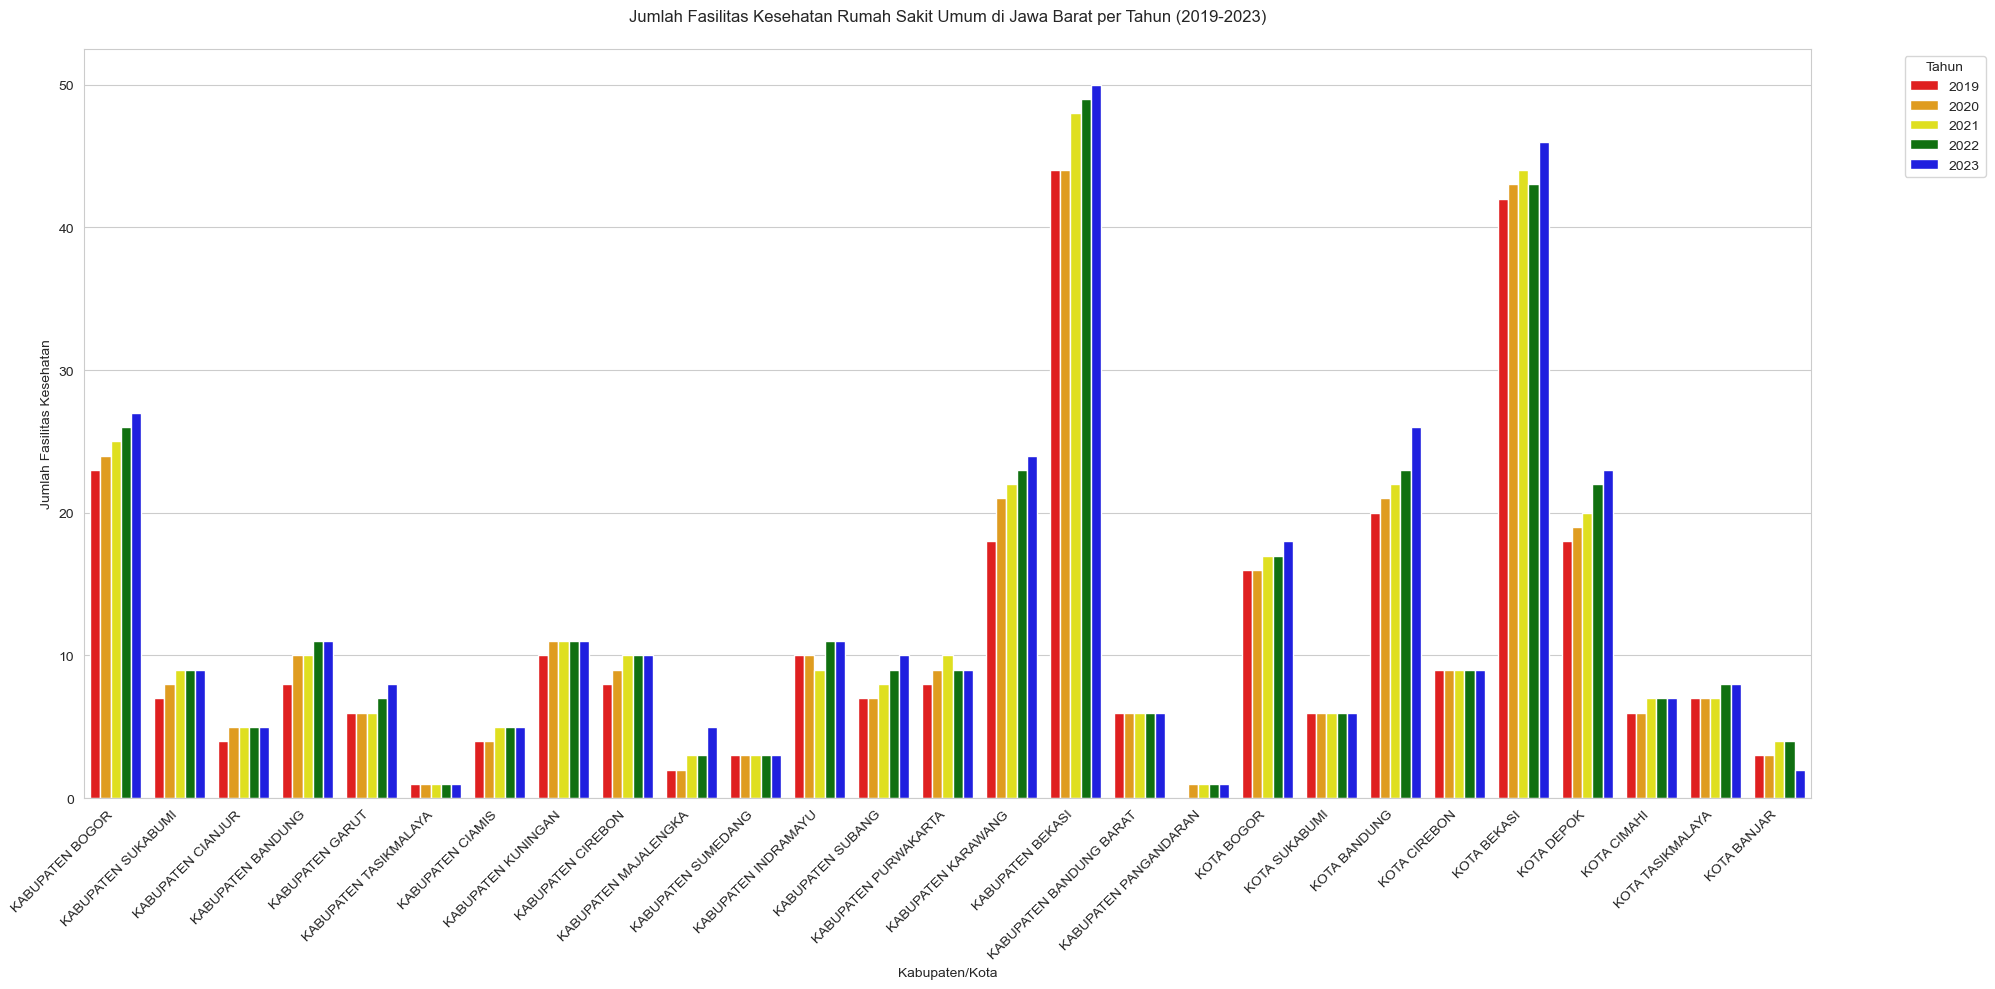

In [111]:
# Filter dataset untuk jenis faskes Rumah Sakit Umum
df = clean_faskes[clean_faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM']

# Membuat plot
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Membuat barplot dengan warna sesuai tahun
palette = {
    2019: 'red', 
    2020: 'orange', 
    2021: 'yellow', 
    2022: 'green', 
    2023: 'blue'
}

sns.barplot(
    data=df, 
    x='nama_kabupaten_kota', 
    y='jumlah_faskes', 
    hue='tahun', 
    palette=palette
)

# Mempercantik tampilan
plt.title('Jumlah Fasilitas Kesehatan Rumah Sakit Umum di Jawa Barat per Tahun (2019-2023)', pad=20)
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Fasilitas Kesehatan')

# Merotasi label x agar terbaca
plt.xticks(rotation=45, ha='right')

# Mengatur legend
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mengatur layout agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()
